# DATA ANALYSIS

## *CONCLUSIONS¶*
### Postgres Data Analysis

* No duplicates on the Data Bases were found
* Joining employees and salary tables a total of 300,0024 persons were found in the record
* In 1986 there is record of 36,232 hirings
* Managers by department
    * Marketing, Finance, Human Resources, Development, Sales, Research 2 managers
    * Production, Quality Management, Customer Service 4 managers
* There is 20 employees whose firs name is Hercules and first name starts with "B"
* There are 52,245 sales employees, representing 1.74% of the roll
* Among Sales and Development departments there are 137,952 employees, representing 4.6% of the roll

### Bonus Data Analysis
* Histogram> Most common salary ranges are found at income of 40,000 USD
* In average, salary by title is
    * Senior Engineer as of 48,506.80 USD income as Minimum
    * Senior Staff as of 58,550.17 USD income as Maximum
    * Salary Mode is found with the Technique Leader as of 48,582.90 USD income
* Put together, we can see that, higher salaries are found within less of the employees

## *Data Engineering Steps¶*

- [x] Sketched out Entity Relationship Diagram (ERD) of employee database tables; specifying data types, primary keys and foreign keys and common relations.
- [x] Exported ERD to PostgreSQL, creating table schemas and constraints for each of the six CSV files.
- [x] Imported CSV files to each corresponding SQL table.
- [x] There were 2 ways of importing the final databases to be run in Jupyter
     * Imported directly from SQLpostgres engine to read SQL tables in Jupyter notebook with psycopg2
     * By using Inner joins, create in SQL, a new Table with all the columns requested on the Bounus Challenge and exporting it into a CSV file. Then reading it in my jupyter notebook as csv file and as one complete table from which I take the info to create the charts (in order to keep my file simple just added the first solution, but added the new csv created for the bonus)

### *TROUBLESHOOTING*
1. ERD, selecting relationships and PK-FK
1. QuickDBD exported file was imported with key errors that I have to correct
1. Excel dates. Fixing and reverting dates to DD-MM-YY, creating a new employee.csv 
1. Connecting SQL with Jupyter. Class engine coding did not worked out so, have to use psycopg2

In [164]:
# For PostGREs and SQLAlchemy
#!pip install psycopg2 sqlalchemy

In [165]:
# Dependencies and Setup
# SQL Alchemy
import psycopg2
from sqlalchemy import create_engine

# Pandas
import pandas as pd

# Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# NumPy
import numpy as np


In [166]:
#Connect using psycopg2
conn = psycopg2.connect("dbname=EmployeesDB user=postgres password=mypwd host=localhost")

#Activate connection cursor
cur = conn.cursor()

In [167]:
# Query All Records in the Salaries Table
salaries_data = pd.read_sql("SELECT * FROM salaries", conn)
salaries_data.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


In [168]:
# Query All Records in the Titles Table
titles_data = pd.read_sql("SELECT * FROM titles", conn)
titles_data.head()

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer


In [169]:
#Rename title_id to merge with combo_data1
title_rename= titles_data.rename(columns={"title_id":"emp_title_id"})
title_rename.head()

,emp_title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer


In [170]:
# Query All Records in Employees Table
employees_data = pd.read_sql("SELECT * FROM employees", conn)
employees_data.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18


In [171]:
# Merge Columns / Combine Data from Employees Table with salaries Table nameed combo_data1
combo_data1 = pd.merge(employees_data,salaries_data, on="emp_no", how="inner")
combo_data1.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07,53422
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21,48973
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,40000
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18,40000


In [172]:
# Merge Columns / Combine Data from combo_data1 with title Table named combo_data2
combo_data2 = pd.merge(combo_data1,title_rename, on="emp_title_id", how="inner")
combo_data2.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary,title
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000,Staff
1,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,40000,Staff
2,273487,s0001,1957-04-14,Christoph,Parfitt,M,1991-06-28,56087,Staff
3,246449,s0001,1958-03-23,Subbu,Bultermann,F,1988-03-25,87084,Staff
4,48085,s0001,1964-01-19,Venkatesan,Gilg,M,1993-06-28,63016,Staff


In [192]:
# Groupby Title
grouped_df = combo_data2.groupby("title").mean()
grouped_df_sort = grouped_df.sort_values("salary", ascending=True)
grouped_df_sort

,emp_no,salary
title,,
Senior Engineer,253038.749885,48506.799871
Engineer,253654.345919,48535.336511
Assistant Engineer,252992.595373,48564.434447
Technique Leader,251811.432730,48582.896092
Manager,110780.833333,51531.041667
Staff,253408.503604,58465.382850
Senior Staff,254481.798969,58550.172704


In [193]:
# Drop emp_no from grouped_df to Show Only title & salary and reset index for plotting
revised_grouped_df = grouped_df_sort.drop(columns = "emp_no").reset_index()
revised_grouped_df["salary"]=revised_grouped_df["salary"].map("${:,.2f}".format)
revised_grouped_df

,title,salary
0,Senior Engineer,"$48,506.80"
1,Engineer,"$48,535.34"
2,Assistant Engineer,"$48,564.43"
3,Technique Leader,"$48,582.90"
4,Manager,"$51,531.04"
5,Staff,"$58,465.38"
6,Senior Staff,"$58,550.17"


# *Create a bar chart of average salary by title.*

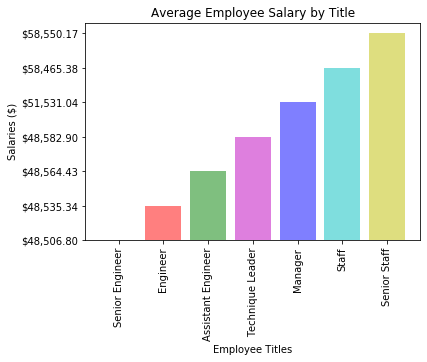

In [194]:
# Set x_axis, y_axis & Tick Locations
x_axis = revised_grouped_df["title"]
ticks = np.arange(len(x_axis))
y_axis = revised_grouped_df["salary"]
 
# Create Bar Chart Based on Above Data
plt.bar(x_axis, y_axis, align="center", alpha=0.5, color=["k", "r", "g", "m", "b", "c", "y"])

# Create Ticks for Bar Chart's x_axis
plt.xticks(ticks, x_axis, rotation="vertical")

# Set Labels & Title
plt.ylabel("Salaries ($)")
plt.xlabel("Employee Titles")
plt.title("Average Employee Salary by Title")

# Show plot
plt.show()

# *Create a histogram to visualize the most common salary ranges for employees*


In [239]:
combo_data2

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary,title
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000,Staff
1,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,40000,Staff
2,273487,s0001,1957-04-14,Christoph,Parfitt,M,1991-06-28,56087,Staff
3,246449,s0001,1958-03-23,Subbu,Bultermann,F,1988-03-25,87084,Staff
4,48085,s0001,1964-01-19,Venkatesan,Gilg,M,1993-06-28,63016,Staff
...,...,...,...,...,...,...,...,...,...
300019,111400,m0001,1959-11-09,Arie,Staelin,M,1985-01-01,72446,Manager
300020,111133,m0001,1955-03-16,Hauke,Zhang,M,1986-12-30,71148,Manager
300021,110085,m0001,1959-10-28,Ebru,Alpin,M,1985-01-01,60026,Manager
300022,110386,m0001,1953-10-04,Shem,Kieras,M,1988-10-14,40000,Manager


Text(0, 0.5, 'Number of employees')

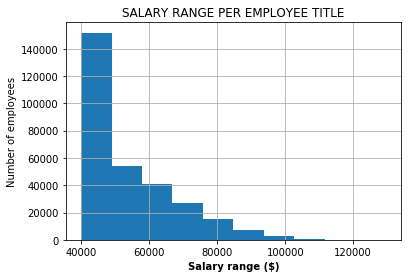

In [241]:
#Plotting histogram Method1
hist_plot = combo_data2["salary"]. hist(bins=10)
hist_plot.set_title("SALARY RANGE PER EMPLOYEE TITLE")
hist_plot.set_xlabel("Salary range ($)", weight="bold" )
hist_plot.set_ylabel("Number of employees", weight="bold")

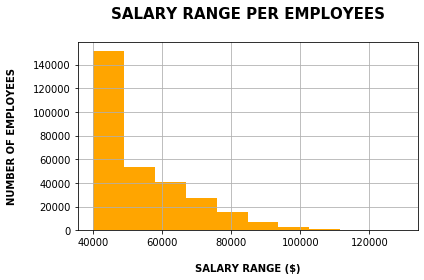

In [236]:
#Plotting histogram Method2
plt.hist(combo_data2["salary"], color='orange', alpha=1);

plt.xlabel("\nSALARY RANGE ($)", weight="bold");
plt.ylabel("NUMBER OF EMPLOYEES\n", weight="bold");
plt.title("SALARY RANGE PER EMPLOYEES\n", weight="bold", size=15)

plt.grid()
plt.tight_layout()